In [1]:
from skimage.measure import label, regionprops
from captchas_generator import CaptchasGenerator
import numpy as np
from matplotlib import pyplot as plt
import pickle

### 1. Generating Simple CAPTCHAS

In [2]:
captcObj = CaptchasGenerator()
captchGen = captcObj.generate_sample(500)

The target for this image is: 22


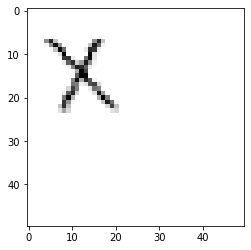

In [19]:
image, target = captchGen.__next__()
plt.imshow(image, cmap="Greys")
print("The target for this image is: {0}".format(target))

### Letters Datasets Generators
- Tagets are integer values between 0 and 26
- Each integer represent a letter of alphabet

In [3]:
captcObj = CaptchasGenerator()
captchGen = captcObj.generate_sample(3000)

In [4]:
dataset = []
targets = []
for let_im, let_tar in captchGen:
    dataset.append(let_im)
    targets.append(let_tar)

In [16]:
with open("../../data/captchas/base-captchas/image", "wb") as f:
    pickle.dump(dataset,f)

with open("../../data/captchas/base-captchas/targets", "wb") as f:
    pickle.dump(targets,f)
    

### Words DataSets Generator
- Words of Size N

In [5]:
import string

In [12]:
def generate_captchas_words(max_words=10000, wrd_size=4, size=(100,50) ):
        i=0
        captchGenerator = CaptchasGenerator()
        letters = string.ascii_uppercase
        # Generating Image Captchas Sets

        for i in range(max_words):
            new_code = ''.join(np.random.choice(list(letters),wrd_size)).upper()
            new_capth_wrd = captchGenerator.create_captcha(new_code, shear=np.random.uniform(0,1), size=size)

            yield new_capth_wrd, new_code

In [13]:
genet = generate_captchas_words()

wordsimg = []
wordstr = []
for input_captch_wrd, target_captchas in genet:
    wordstr.append(target_captchas)
    wordsimg.append(input_captch_wrd)


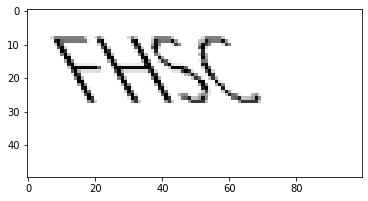

In [24]:
CaptchasGenerator().display_word(wordsimg[0])

In [23]:
with open("../../data/captchas/words-base-captchas/words-basic-img", "wb") as f:
    pickle.dump(wordsimg,f)

with open("../../data/captchas/words-base-captchas/words-label", "wb") as f:
    pickle.dump(wordstr,f)
    